<a href="https://colab.research.google.com/github/priyankamuduli05/mobile_price_prediction_classification/blob/main/Mobile_Price_Range_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type** - Machine Learning - Classification
##### **Contribution**    - Individual
##### **Name** - Priyanka Muduli

# **Project Summary -**

The mobile phone industry is highly competitive, and the price of a mobile phone is determined by various factors, including battery power, bluetooth, camera quality, screen size and more. In this context, a study was conducted to understand the factors influencing the price range of mobile phones. The study used a dataset containing around 21 variables to predict the price range of mobile phones, categorized as low, medium, high and very high.

The first step in the analysis involved DATA WRANGLING, where missing values were handled and unique values were checked. The study identified 180 phones had pixel resolution height as 0 and two phones had screen width in cm as 0. The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, the study replaced these 0 values with the mean values, ensuring that no missing values were left in the dataset.

Next, the study performed EXPLORATORY DATA ANALYSIS (EDA), which received that all category phones were distributed with equal price range. The analysis also indicated that battery capacity was positively correlated with the price range of mobile phones, and the distribution of battery capacity gradually increased with the price range. This suggested that consumers may be willing to pay more for a mobile phone with a higher battery capacity. The study found that almost half the devices had bluetooth and half did not.

The scatter plot showed a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This indicated that as the price range increased, the amount of RAM in the device generally increased as well. The study also found that the count of devices with dual sim was increasing for the very high price range. Additionally, the distribution of primary camera megapixels across different target categories was relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones.

The analysis of the screen size distribution amang different target categories indicated that there were not a significant difference in the distribution, suggesting that screen size may not be the sole diving factor in determining the target categories. However this uniformity in distribution, can be advantegous for predictive modelling as it implies that screen size may not be a significant variable in differentiating between different target categories, allowing other features to play a more crucial role in determining the target categories. This study also found that mobile phones with higher price ranges tended to be lighter in weight compared to lower price range phones.

After the EDA, the study performed HYPOTHESIS TESTING  on three statements and handled outliers. The study identified that RAM, battery power and pixel quality were the most significant factors affecting the price range of mobile phones. The study then performed FEATURE ENGINEERING and implemented Machine Learning Models such as LOGISTIC REGRESSION FOREST, and XGBoost. Based on the experiments, the study concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In conclusion, the study found that the mobile phones in the dataset were divided into four different price ranges, each having a similar number of elements. Additionally, the study found that approximately half of the devices had bluetooth, while the other half did not. Furthermore the study found that as the price range increased, there were a gradual increase in battery power and RAM showed continous growth from low cost to very high cost phones. Moreover, the study found that the costly phones tend to be lighter than the lower priced phones.

The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. Finally, the study found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provided the best performane in predecting the price range of mobile phones.

# **GitHub Link**

https://github.com/priyankamuduli05/mobile_price_prediction_classification

# **Problem Statement**


In the competitive mobile phone market, companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone eg:- RAM, Internal Memory etc and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Importing warnings library. The warning module handels warnings in python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Mobile Data CSV file
# load the seol bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_mobile_price_range.csv')

### Dataset First View

In [4]:
# Dataset First Look From Top Five Rows and Columns
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Dataset First Look From Bottom Five Rows and Columns
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicated_values_count = len(df[df.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

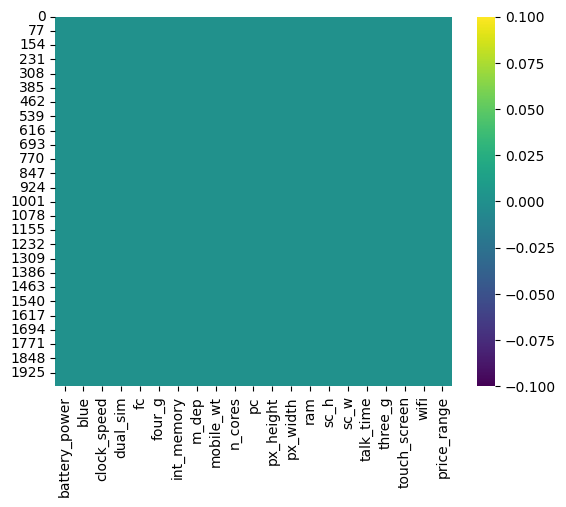

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)

We can see that in the above Heatmap, there is no yellow line, which means that there is no nill value.

### What did you know about your dataset?

Observataion About Dataset

1. The dataset contains 21 columns and 2000 rows.
2. No duplicate values present in the dataset.
3. No missing values present in the dataset

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
# Length of columns
len(df.columns)

21

In [13]:
# Dataset Describe
# Transpose of data Description
df.describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description



**Battery_power:** Total energy a battery can store in one time measured in mAh.

**Blue:** Has bluetooth or not.

**Clock_speed:** speed at which microprocessor executes instructions.

**Dual_sim**: Has dual sim support or not.

**Fe:** Front camera mega pixels.

**Four_g**: Has 4g or not.

**Int_memory:** Internal memory in Gigabytes.

**M_dep**: Mobile depth in cm.

**Mobile_wt**: Weight of mobile phones.

**N_cores**: Number of cores of processor.

**Pc**: Primary camera mega pixels.

**Px_height**: Pixel Resolution height

**Px_width**: Pixel Resolution width

**RAM**: Random Access Memory in Mega

**Touchscreen:** Has touch screen or not.

**Wifi:** Has Wifi or not.

**Sc_h:** Screen heigh of mobile in cm.

**Sc_w:** Screen width of mobile in cm.

**Talk_Time:** longest time that a single battery charge will last when you are.

**Three_g:** Has 3g or not.

**Wifi:** Has Wifi or not.

**Price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(High Cost), 3(Very High Cost)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}")

Unique values for battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values for blue: [0 1]
Unique values for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values for dual_sim: [0 1]
Unique values for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values for four_g: [0 1]
Unique values for int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

In [15]:
# Checking Unique Values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

# The minimum value of px_height and sc_w should not be 0, as it does not make sense for a scrren width or pixelheight to be 0.
# Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

# Count number of phones with sc_w = 0
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

# Count number of phones with px_height = 0
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0: {px_height_zero_count}")

Number of phones with sc_w = 0: 180
Number of phones with px_height = 0: 2


In [17]:
# Replace 0 values with mean values
sc_w_mean = df.sc_w.mean()
px_height_mean = df.px_height.mean()

df.sc_w = np.where(df.sc_w == 0, sc_w_mean, df.sc_w)
df.px_height = np.where(df.px_height == 0, px_height_mean, df.px_height)

# Print the updated dataframe
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [18]:
# Checking whether there is duplicates or not.
len(df[df.duplicated()])

0

In [19]:
# Null Values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### What all manipulations have you done and insights you found?

Observations

1. I have found that number of phones with pixrl resolution height and screen width of mobile in cm are 180 and 2 respectively contains 0 values.
2. The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.
3. So the 0 value are replaced with the mean values and no missing values left in the table so our data is ready for data analysis!

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Price Range

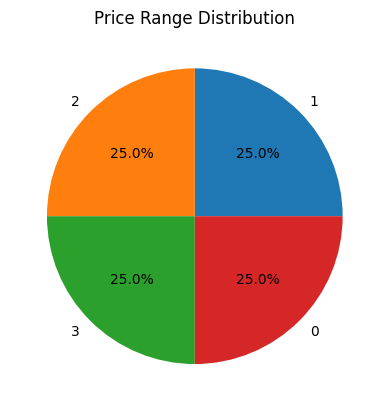

In [20]:
# Chart - 1 visualization code

# Classes

price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct = '%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart to know the distribution of percentage of phones with price range low to high.

##### 2. What is/are the insight(s) found from the chart?

All category phones are distributed with equal price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes we are able to know distribution of phones in percentage so we have information about distributions.

#### Chart - 2

Battery Power

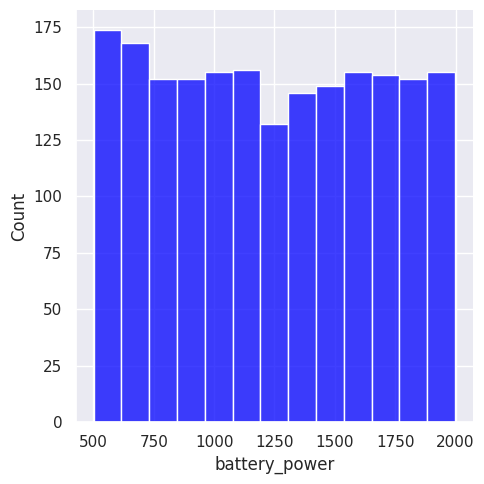

In [21]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(df["battery_power"], color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

To know the count increasing with battery power or not.

##### 2. What is/are the insight(s) found from the chart?

This plot visualizes how the battery capacity, measured in mAh, is distributed across the dataset. We can observe that the distribution of battery capacity is positively correlated with the price rangeof the mobile phones, as there is a gradual increase in the battery capacity as the price range increases. This suggests that there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained form analyzing the relationship between the battery capacity and the price of a mobile phone can be potentially lead to a positive business impact. If a mobile phone manufacturer is able to produce phones with higher battery capacity at a reasonable cost, they may be able to attract more customers and generate more revenue by offering phones at higher price points. Additionally, this information can also inform marketing and advertising efforts, as companies can use this insight to highlight the battery capacity of their phones as a key selling point to potential customers.

#### Chart - 3

Bluetooth

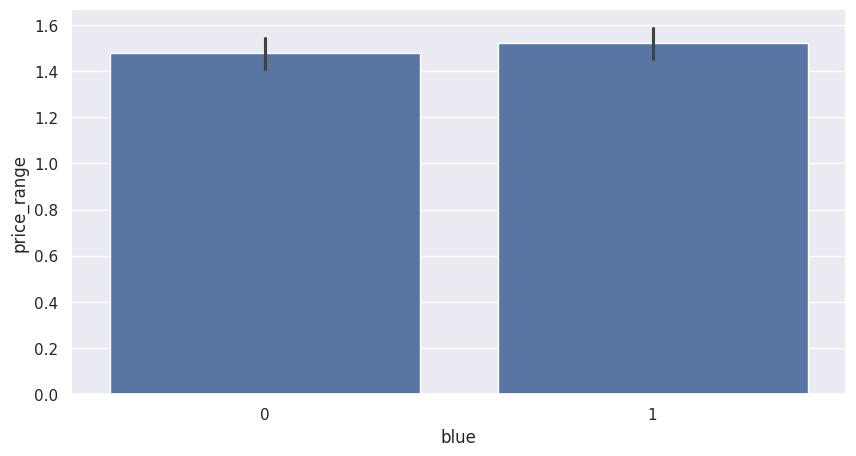

In [22]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

To know the devices having bluetooth or not with price range.

##### 2. What is/are the insight(s) found from the chart?

About half of the devices having bluetooth and half don't.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observation that almost half of the devices in the dataset have bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies. For example, a mobile phone manufacturer could ude this insight to understand that customers value the presence of bluetooth in their devices and therefore may prioritize investing in the development of bluetooth related features or promoting the presence of bluetooth in their marketing efforts.

On the other hand, this observation could also have negative consequences if a compant misinterprets or missuues this information. For instance, a company might assume that including bluetooth in their devices is not important because half of the devices in the datset do not have it. However, this conclusion ignores the fact that many customers still value the presence of bluetooth  in their devices and a manufacturer that fails to include bluetooth in their devices could miss out on potential sales and growth opportunities. Therefore, it is important to interpret this information carefully and use it in a way that aligns with customer preferences and market trends.

#### Chart - 4

RAM

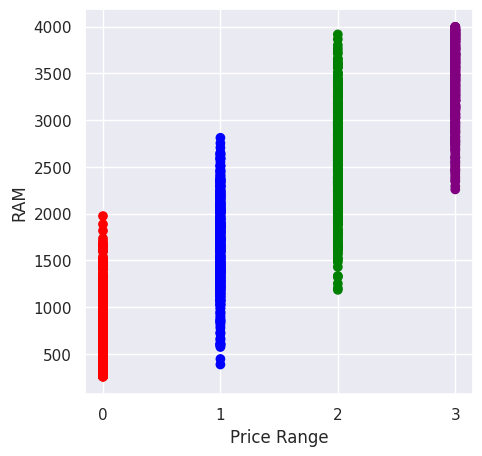

In [23]:
# Chart - 4 visualization code
# Craete a color map for the points based on price range
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Create the scatter plot
plt.scatter(df['price_range'], df['ram'], c=df['price_range'].apply(lambda x: colors[x]))
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()

##### 1. Why did you pick the specific chart?

To know the price relation with ram.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests that as the price range increases, the amount of RAM in the device generally increases as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot, such as the positive correlation between RAM and price range, can be valuable for business. For example, business can use this information to design and market smartphones with higher RAM for customers willing to pay higher prices, potentially leading to increased revenue and profits.

#### Chart - 5

dual_sim

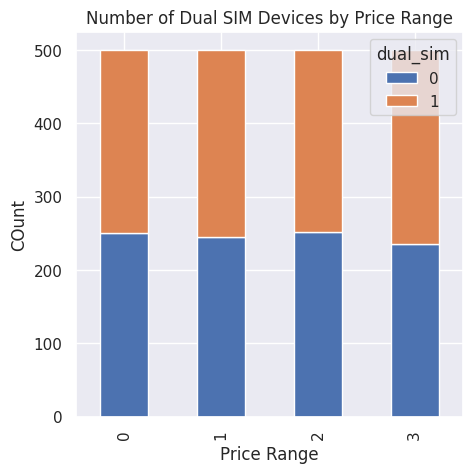

In [24]:
# Group the data by price range and dual sim, and count the number of devices in each group
sim_count = df.groupby(['price_range', 'dual_sim'])['dual_sim'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns, and the count as values
sim_count = sim_count.unstack()

# Plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar', stacked=True)

# Add axis labels and a chart
plt.xlabel('Price Range')
plt.ylabel('COunt')
plt.title('Number of Dual SIM Devices by Price Range')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the price range according to dual sim using or not.

##### 2. What is/are the insight(s) found from the chart?

We can observe that upto low, medium, high almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it is very useful because we can identify dual sim actually increasing count or not. It is found that for device containg dual sim.

#### Chart - 6

four_g

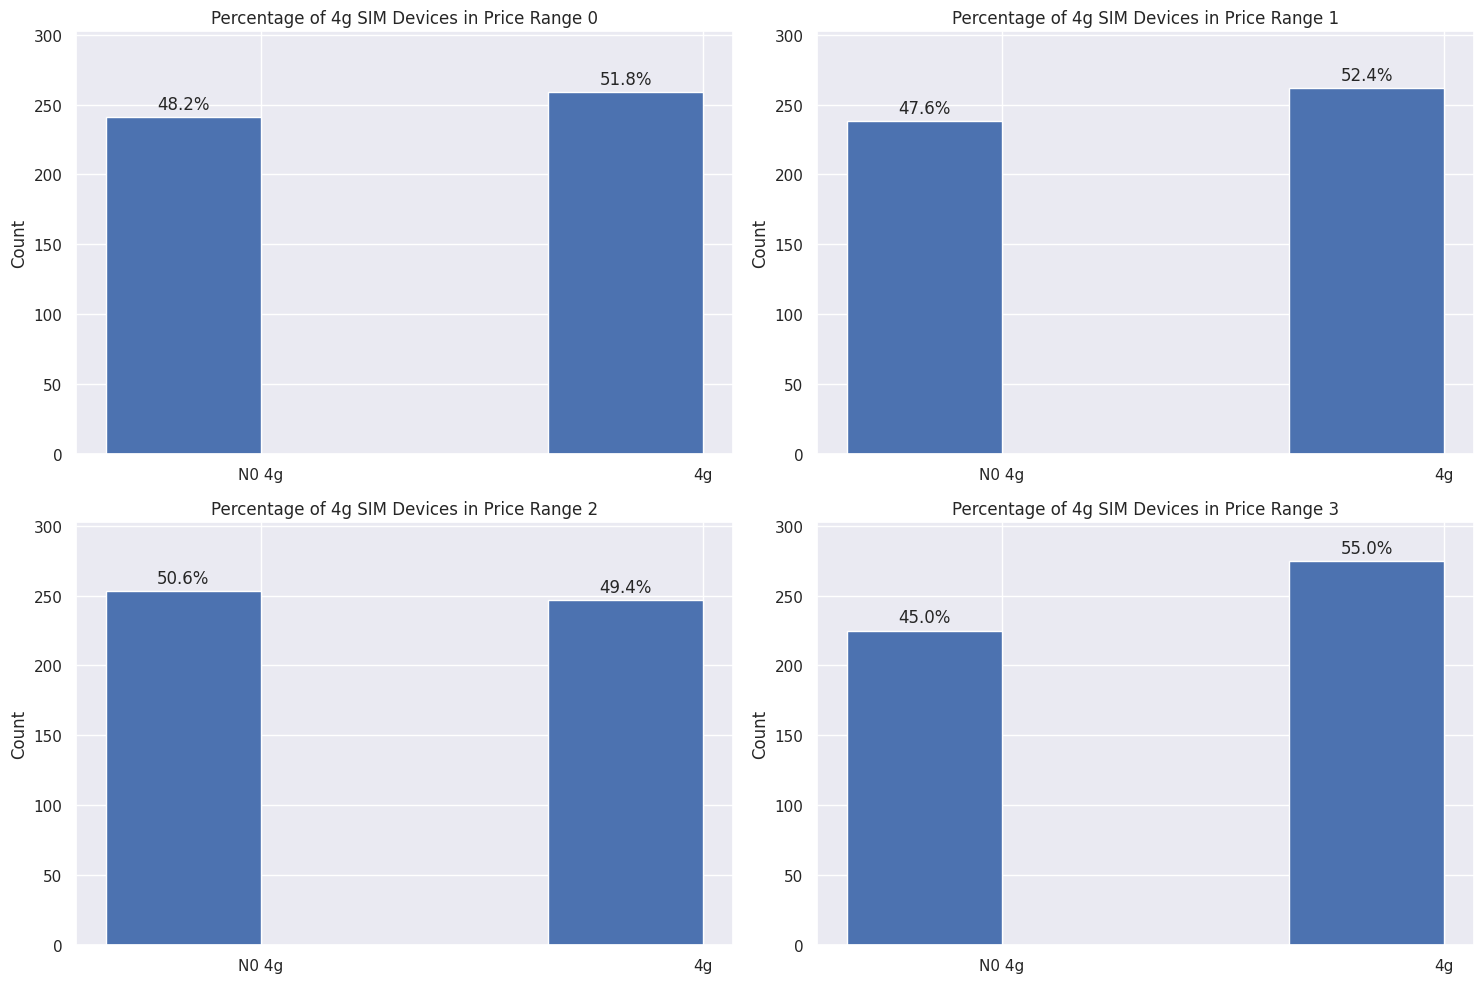

In [25]:
# Group the data by price range and 4g SIM and count the number of devices in each group
fourg_count = df.groupby(['price_range', 'four_g'])['four_g'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns, and the count as values
fourg_count = fourg_count.unstack()

# Create bar charts for each price range
labels = ['N0 4g', '4g']
x = np.arange(len(labels))
width = 0.35

fig,axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
  ax = axs[i//2, i%2]
  sizes = fourg_count.loc[i]
  rects1 = ax.bar(x - width/2, sizes, width)
  ax.set_title('Percentage of 4g SIM Devices in Price Range {}'.format(i))
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.set_ylabel('Count')
  ax.set_ylim([0, max(fourg_count.max())*1.1])
  for rect in rects1:
    height = rect.get_height()
    ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis=1)[i]*100),
                xy=(rect.get_x() + rect.get_width() /2, height),
                xytext=(0, 3), # Points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To know the percentage of 4G SIM of mobile phones.

##### 2. What is/are the insight(s) found from the chart?

I have found that at low(0), medium(1), very high(3) prices the mobile phones having sim in more numbers but at high(2) prices it is showing slightly collapse.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the number of SIM cards in mobile phones at different price ranges can be helpful in creating a positive business impact. For example, if a company wants to introduce a new product in a specific price range, they can use this information to determine whether their target market prefers phones with a single SIM or dual SIM and adjust their product accordingly.

However, the slight collapse in the number of SIM cards at high prices may suggest that consumers at that price range prioritize other features over having multiple SIM cards. The insight can be negative for companies that primarily focus on providing phones with multiple SIM cards. It may be necessary for such companies to reconsider their strategy and consider other features that consumers in the high price range prioritize.

#### Chart - 7

pixel_width

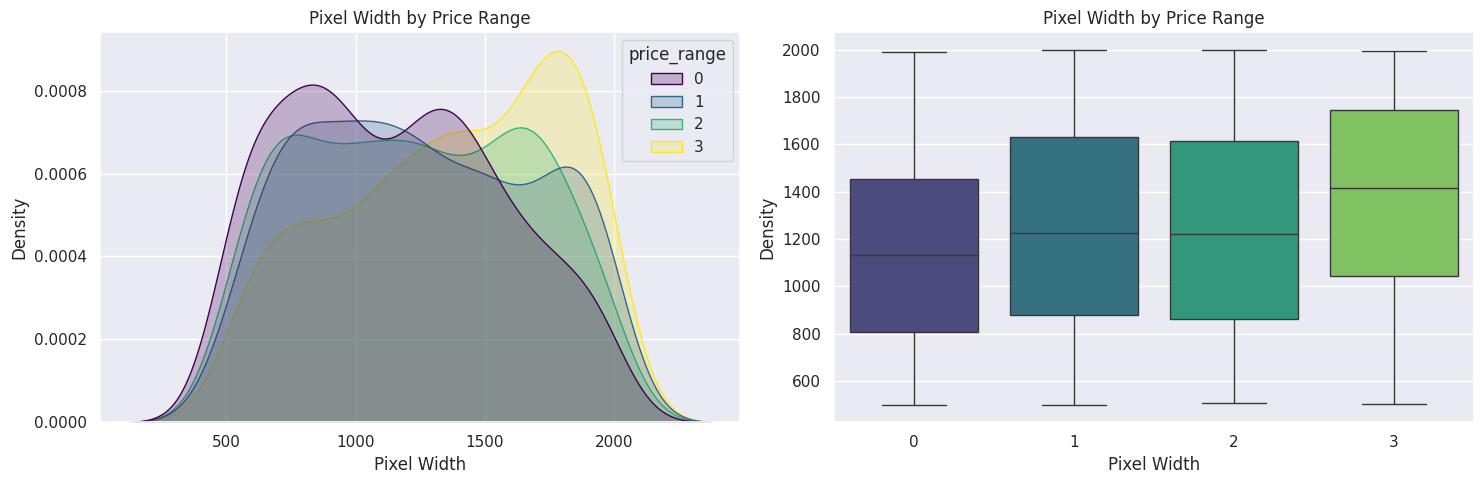

In [26]:
# Chart - 7 visualization code
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for pixel width distribution for each price range
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width by Price Range')

# Create a box plot of pixel width for each price range
sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Pixel Width')
axs[1].set_ylabel('Density')
axs[1].set_title('Pixel Width by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

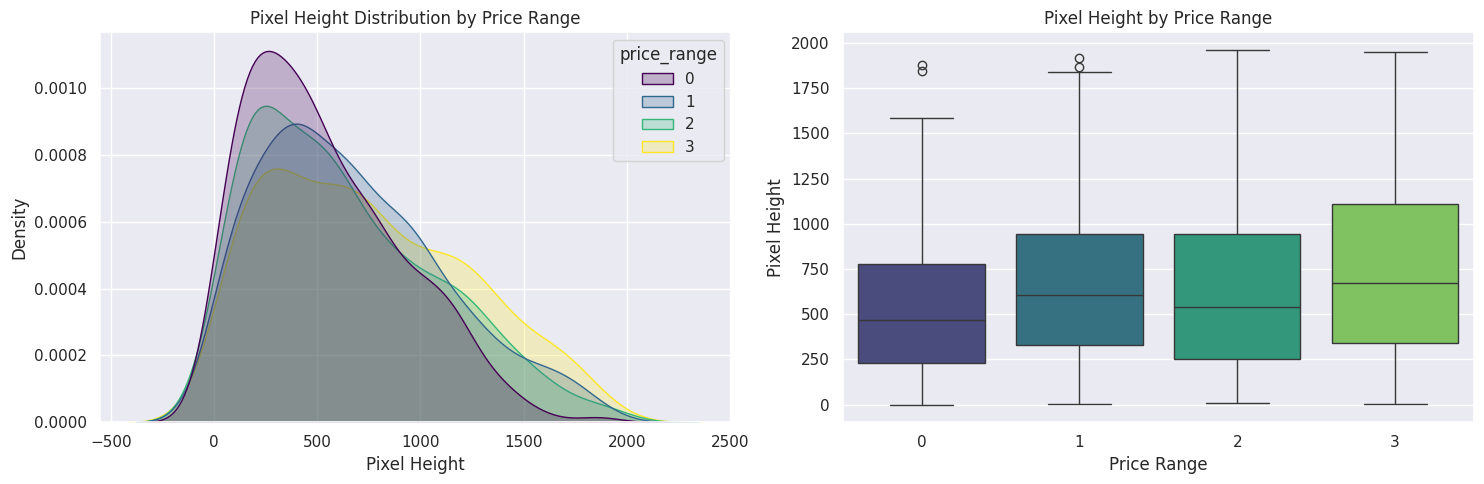

In [27]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for pixel width distribution for each price range
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Create a box plot of pixel width for each price range
sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the pixel width on the price range.

##### 2. What is/are the insight(s) found from the chart?

Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be sole diving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity and brand value may also play a significant role in determining the price range. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market. Pixel height is almost similar as we move from Low cost to Very high cost little variation in pixel_height.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of pixel height distribution across different price ranges can help create a positive price ranges can help create a postive business impact by providing useful information to mobile phone manufacturers and marketers. By understanding the relationship between pixel height and price range, manufacturers can optimize their product design and pricing strategy to meet the demands of the market and improve sales. Marketers can also leverage this information to develop targeted advertising campaigns and promotions that appeal to the preferences of differnet consumer segments.

However, the fact that there is little variation in pixel height as we move from low cost to very high cost mobile phones may pose a challenge for manufacturers and marketers. If pixel height is nor significant diving factor in determining the price range of mobile phones, manufacturers nad marketers may need to focus on other features such as processor, camera quality, storage capacity and brand value to differentiate their products and stand out in a highly competitive market. Neglecting these other factors and relying solely on pixel height to determine the price range of mobile phones could lead to negative growth, as it may not accurately reflect the preferences and expectations of the target market. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.  

#### Chart - 8

FC (front camera megapixels)


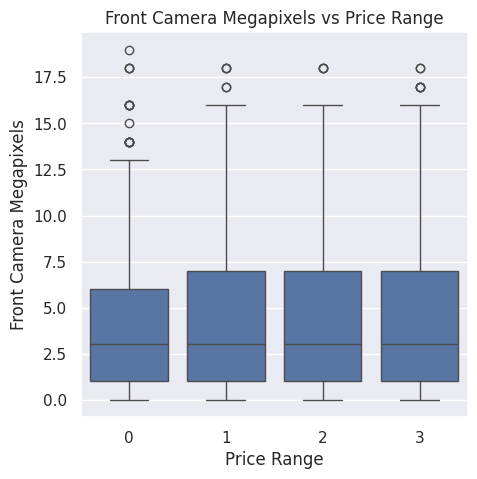

In [28]:
# Chart - 8 visualization code
# Set up the figure and axes
sns.boxplot(x = 'price_range', y='fc', data=df)

# Set x and y axis labels and title
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the impact of price range on front camera megapixels.

##### 2. What is/are the insight(s) found from the chart?

It is almost same impact of price range in all categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observation that the distribution of front camera megapixels is similar across all price ranges suggests that this feature alone may not be a helpful predictor of price range. However, this does not necessarily mean that the insights gained from this analytics cannot create a positive business impact.

For example, understanding the limitations of certain features in predecting price range can inform the development of more accurate models that consider multiple features simultaneously. This can lead to better pricing strategies and more effective product positioning, ultimately resulting in increased revenue and growth.

On the other hand, if a company relied solely on front camera megapixels to determine pricin, this could lead to negative growth if competitors offered more advances features that customers value more highly. Therefore, it is important for business to consider multiple factors and stay up-to-date with evolving customer preferences and technologies advancements in order to remain competitive in the market.

#### Chart - 9

PC (Primary camera Megapixels)

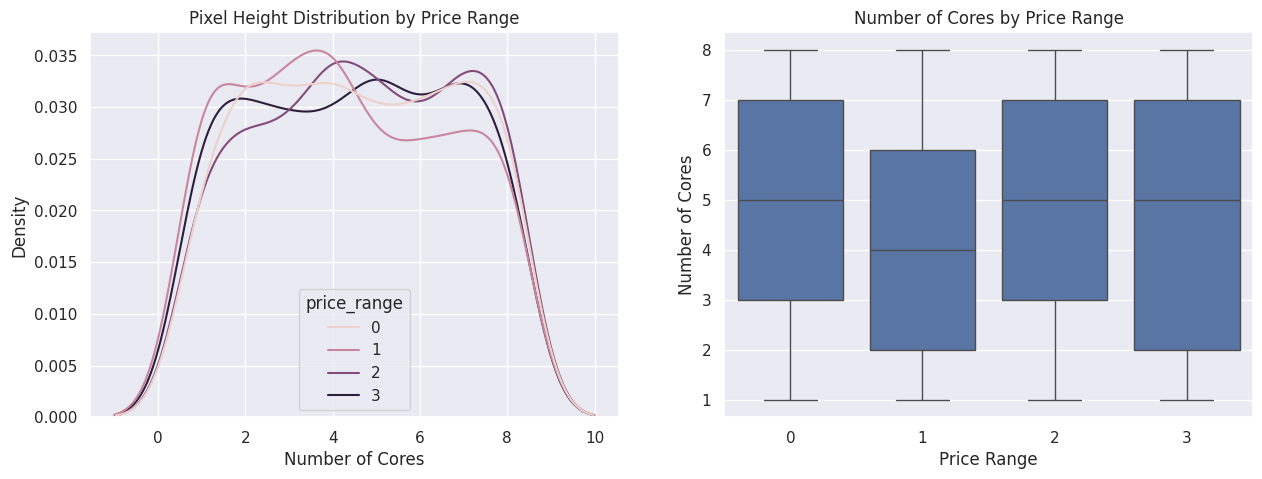

In [29]:
# Chart - 9 visualization code
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimation plot of the distribution of number of cores across price range
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])

# Create a box plot of the distribution of number of cores for each price range
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])

# Set the title of the first subplot and the labels of both subplots
axs[0].set_title('Distribution of Number of Cores by Price Range')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')
axs[1].set_title('Number of Cores by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Number of Cores')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the distribution of number of cores by price range.

##### 2. What is/are the insight(s) found from the chart?

The distribution of primary camera megapixels across different target categories is relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones. This consistency is a positive sign for predection modeling, as it suggests that this feature may not be a major confounding factor in predecting the price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by providing an understanding of the relationship between different features and price range of mobile phones. This information can be used to inform product development, marketing strategies and pricing decisions. For example if the analysis shows that processor speed is a significant factor in determining price range, a company could focus on developing mobile phones with fastefr processors to target higher price ranges.

However, there may also be insights that lead to negative growth. For instance, if the analysis shows that a particular feature that the company is known for, such as camera quality, is not a significant feature in determining price range, this could lead to negative growth if the company continues to prioritize camera quality over other features that are more important to customers.

Therefore, it is important to carefully consider all insights and use them to inform a holistic approach to product development and marketing strategies to ensure positive business impact.

#### Chart - 10

mobile weight

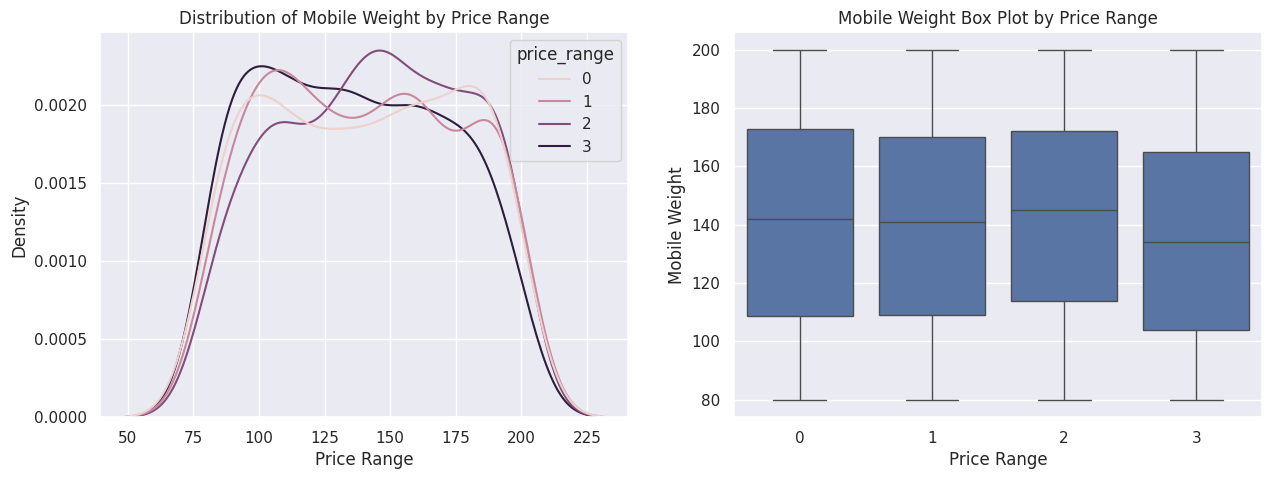

In [30]:
# Chart - 10 visualization code

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a KDE plot of mobile weight vs price range with different colors of each price range
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])

# Create a box plot of mobile weight vs price range
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])

# Set the x-axis label for both subplots
for ax in axs:
  ax.set_xlabel('Price Range')

# Set the y-axis label for the box plot subplot
axs[1].set_ylabel('Mobile Weight')

# Set the title for the first subplot
axs[0].set_title('Distribution of Mobile Weight by Price Range')

# Set the title for the second subplot
axs[1].set_title('Mobile Weight Box Plot by Price Range')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the distribution of mobile weight by price range and mobile weight with respect to price range.

##### 2. What is/are the insight(s) found from the chart?

It can be observed that mobile phones with higher price ranges tend to be lighter in weight compared to lower price range phones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis can be definitely help to create a positive business impact. By understanding which features are more important in determining the price range of mobile phones, businesses can better position their products and pricing strategies in the market. For example, if a certain feature such as battery capacity or camera quality is highly valued by customers in a specific price range, businesses can focus on improving that feature to differentiate themselves from competitors and increased sales.

However, there may be some insights that could potentially lead to negative growth. For instance, if a business relies too heavily on a single feature to determine the price range of their mobile phones, they may miss out an opportunities to cater to the diverse perferences of customers. Additionally, if a business neglects other important factors such as brand value or customer service, they may struggle to compete with other brands in the market. Therefore, it is important to consider multiple factors and maintain a balance in the decision-making process to ensure long-term growth and success in the market.

#### Chart - 11

screen_size

We can convert the screen_size variable from centimeters to inches to allign with real-life usage, as screen sizes are typically communicated in inches.  

In [31]:
# Chart - 11 visualization code
# Defining a new variable 'sc_size' as the diagonal screen in inches
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2)) # Calculating the diagonal screen size
df['sc_size'] = round(df['sc_size']/2.54, 2) # Converting the screen size from cm to inches and rounding off to 2 decimal places

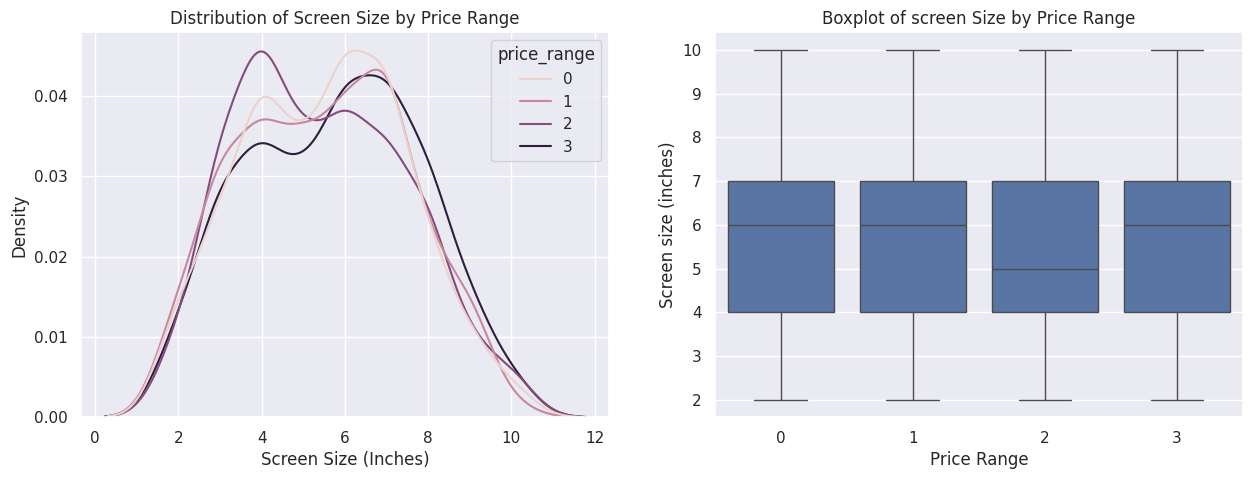

In [32]:
# Create a new variable sc_size in inches
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2)) / 2.54
df['sc_size'] = round (df['sc_size'].round(2))

# Plot the distribution and boxplot of screen size by price range
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])

# Set axis labels and title
axs[0].set_xlabel('Screen Size (Inches)')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of Screen Size by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Screen size (inches)')
axs[1].set_title('Boxplot of screen Size by Price Range')

# Show the Plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the distribution of screen size by price range and price range respects to screen size.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the Screen Size distribution among different target categories indicates that there is not a significant differences in the distribution, suggesting that Screen Size may not be the sole diving factor in determining the target categories. However, this uniformity in distribution can be advantageous for predictive modelling, as it implies that Screen Size may not be a significant variable in differentiating between different target categories, allowing other features to play a more crucial role in determining the target categories.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of various features of mobile phones can have a positive impact on business. By understanding which features are most important in determining the price range of mobile phones, business can make informed decisions about product development, marketing and pricing strategies. For example, if a particular brand has a reputationfor producing high-quality and we are willing to pay a premium price for it.

However, there can be also be insights that lead to negative growth if not properly considered. For instance, if a business only focuses on a single feature such as pixel width or camera megapixels without considering other factors like brand value or processor speed, they may misprice their products and lose customers to competitors who offer better overall value. Additionally, if a business relies haevily on a particular feature that is no longer in demand or becomes outdated, it may struggle to remain competitive in the market. Therefore, it is crucial to take a holistic approach and consider multiple factors when making decisions based on data analysis.

#### Chart - 12

Three_g

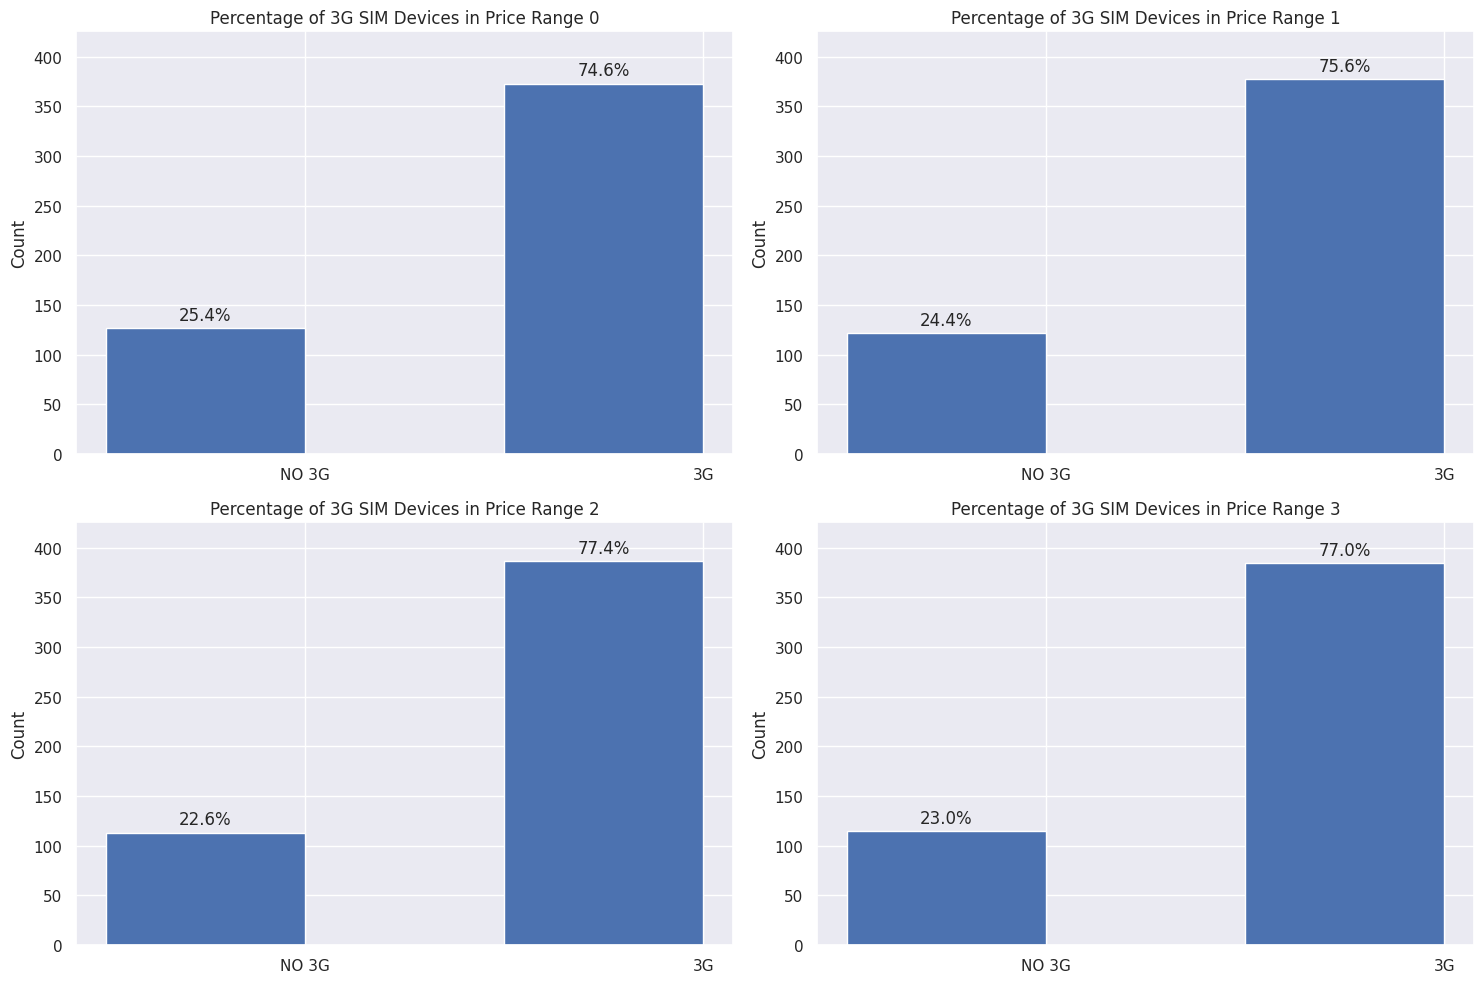

In [33]:
# Chart - 12 visualization code
# Group the data by price range and 3G SIM, and count the number of devices in each group
threeg_count = df.groupby(['price_range', 'three_g'])['three_g'].count()

# Reshape the data into a dataframe with price range as rows, 3G SIM as columns and the count as values
threeg_count = threeg_count.unstack()

# Create bar charts for each price range
labels = ['NO 3G', '3G']
x = np.arange(len(labels))
width = 0.5

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
  ax = axs[i//2, i%2]
  sizes = threeg_count.loc[i]
  rects1 = ax.bar(x - width/2, sizes, width)
  ax.set_title('Percentage of 3G SIM Devices in Price Range {}'.format(i))
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.set_ylabel('Count')
  ax.set_ylim([0, max(threeg_count.max())*1.1])
  for rect in rects1:
    height = rect.get_height()
    ax.annotate('{:.1f}%'.format(height/threeg_count.sum(axis=1)[i]*100),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To know the percentage of 3G sims in all of price range.

##### 2. What is/are the insight(s) found from the chart?

I have found that the three g sims are present more in percentage in all price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights that three-g SIMs are present more in all price ranges could potentially have a positive business impact for companies that manufacture or sell mobile devices. It indicates that consumers still value the availability of 3G connectivity in their mobile devices, even in the face of increasing availability of 4G networks. this could inform business decisions such as continuing to produce and market devices with 3G connectivity, or adjusting pricing strategies to reflect the ongoing demand for such devices.

However, it's important to note that this insight alone does not provide a complete picture of consumer behaviour and preferences. Other factors such brand loyality, operating system preferences and camera quality may also play a role in purchasing decisions. Additionally, this insight may be subject to change over time as technology continues to advance and consumer preferences evolve.

As for negative growth, this insight does not suggest any clear factors that would lead to negative growth. However, it's important to consider the boarder market and competitive landscape when making business decisions, as other factors such as new entrants to the market or change in sonsumer preferences could still have a negative impact.

#### Chart - 13

Wifi

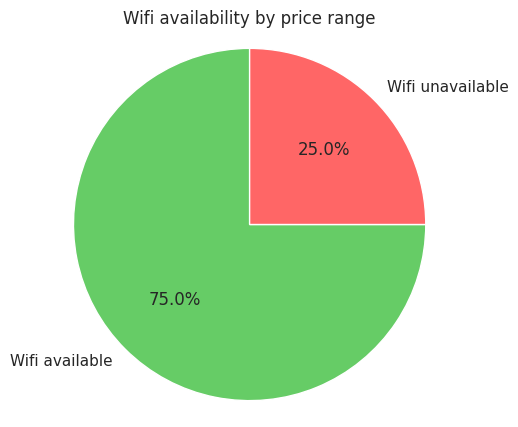

In [34]:
# Chart - 13 visualization code
# Define the four price ranges
price_ranges = {
    'low' : (0,50),
    'medium' : (51,100),
    'high' : (101,200),
    'premium' : (201,float('inf'))
}

# Simulate the availability of Wifi for each price range
wifi_availabilities = {
    'low' : True,
    'medium' : True,
    'high' : False,
    'premium' : True
}

# Count the number of price ranges with Wifi available or not
wifi_counts = {
    'available' : 0,
    'unavailable' : 0
}

for price_range, wifi_available in wifi_availabilities.items():
  if wifi_available:
    wifi_counts['available'] += 1
  else:
    wifi_counts['unavailable'] += 1

# Visualise the result as a pie chart
labels = ['Wifi available', 'Wifi unavailable']
sizes = [wifi_counts['available'], wifi_counts['unavailable']]
colors = ['#66cc66', '#ff6666']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Wifi availability by price range')
plt.show()

##### 1. Why did you pick the specific chart?

To know the wifi available in how much percentage in mobile phones.

##### 2. What is/are the insight(s) found from the chart?

Around in 25% the wifi is not available and in 75% the wifi is available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization can help in creating a positive business impact by providing information about the availability of Wifi in different price ranges. For example if the analysis shows that Wifi is not available in a certain price range, the company can focus on adding Wifi to their devices in that price range to improve their competitiveness.

However, if the analysis shows that Wifi is not available in the majority of price ranges, it could lead to negative growth if customers perceive Wifi as a necessary feature and choose competitors devices over those without Wifi. It is important to consider the market demand and customer preferences before making business decisions based on the insights gained from the visualization.

#### Chart - 14 - Correlation Heatmap

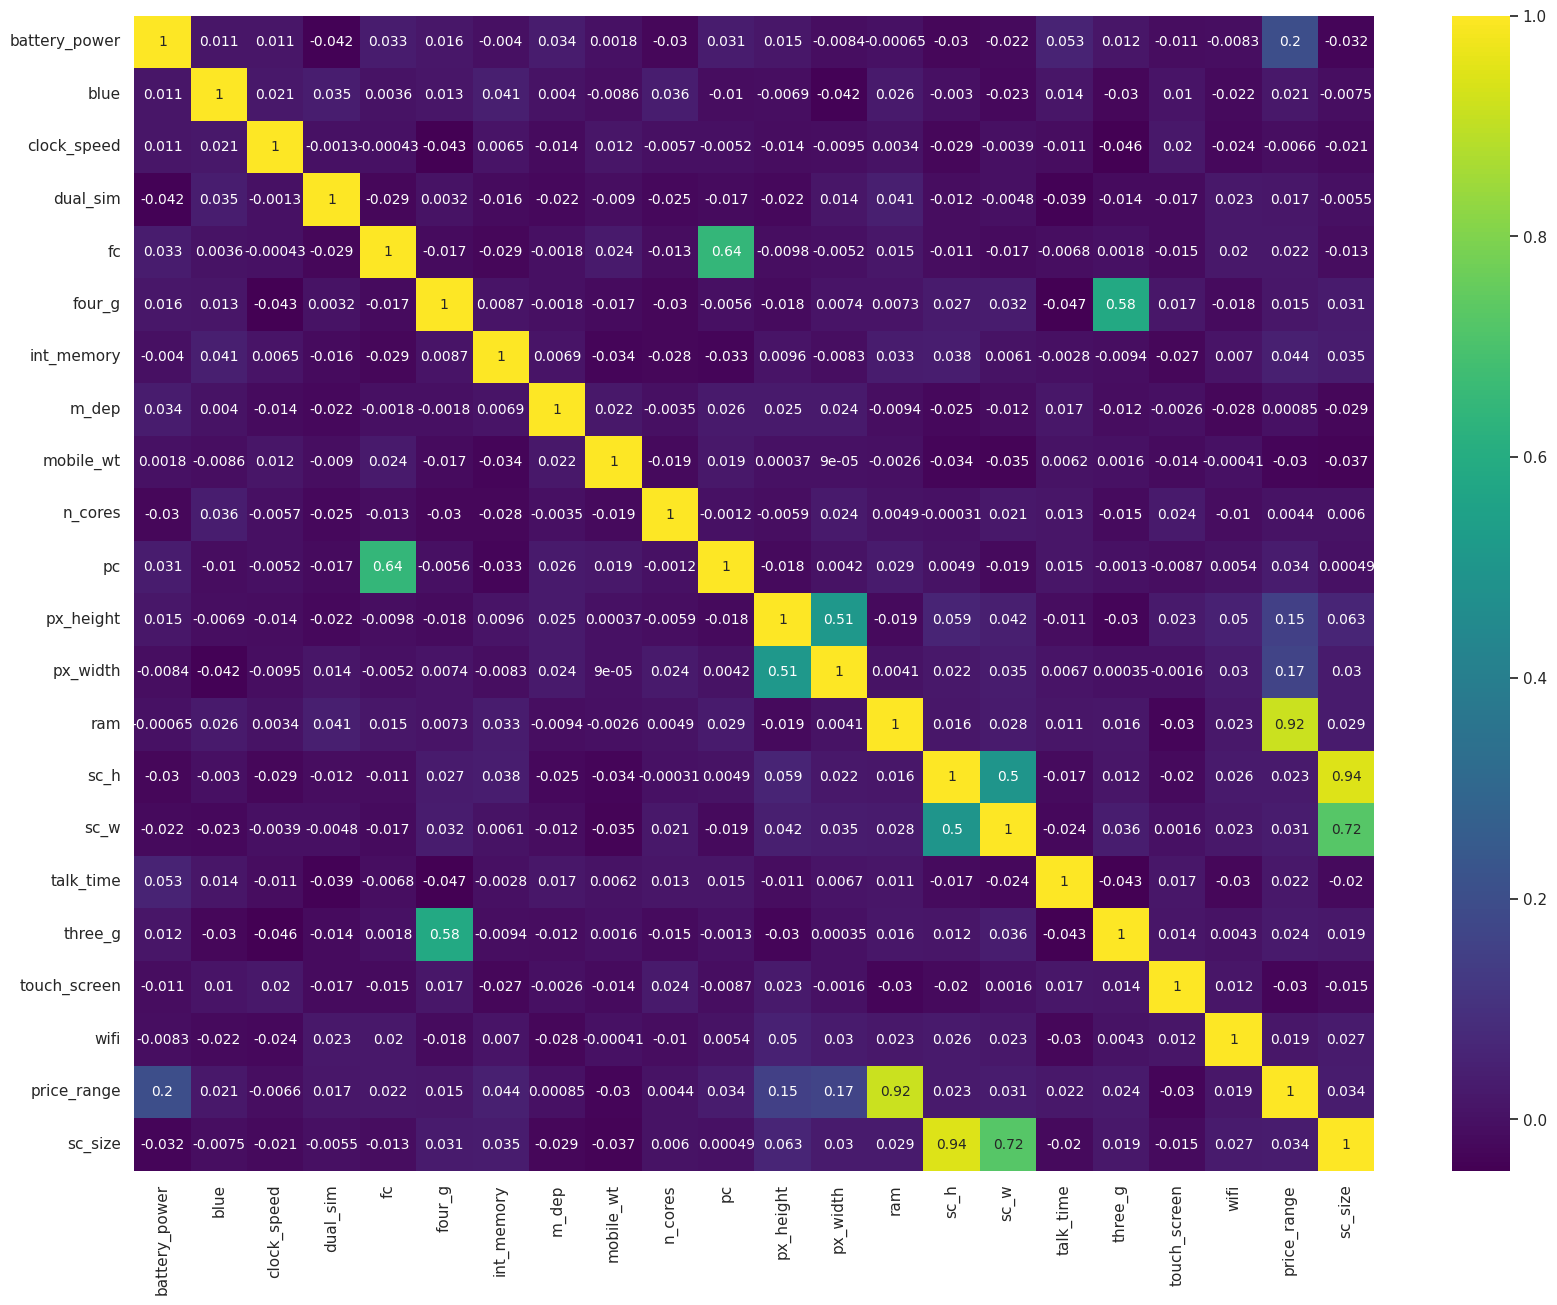

In [35]:
# Correlation Heatmap visualization code
# Check for multi-collinearity
correlation = df.corr()

plt.figure(figsize=[20,15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

##### 1. Why did you pick the specific chart?

To check the multi-collinearity.

##### 2. What is/are the insight(s) found from the chart?

The high correlation between RAM and price_range is a positive sign for business as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

However, there also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of feature ('pc','fc') and ('px_width','px_height'). These correlations make sense, as a phone with a good front camerea is likely to have a good back camera and an increase in pixel height typically corresponds with an increase in pixel width.

To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels in the screen. However, it is important to note thet the 'fc' and 'pc' features should be kept seperate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).

# Hypothesis Testing

Based on your chart experiments define three hypothetical statements from the dataset. In the next three questions perform hypothesis to obtain final conclusion about the statments through your code and statistical testing.

# 1. Hypothetical Statement - All category phones are distributed with equal price range

# 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): All categories of phones are distributed with equal price range.

Alternative hypothesis (H0): All categories of phones are not distributed with equal price range.

# 2. Perform an appropriate statistical test.

In [36]:
# Perform statistical test to obtain P-Value
import pandas as pd
from scipy import stats

# Calculate observed frequency distribution
observed_freq = df['price_range'].value_counts().values

# Calculate expected frequency distribution
total = len(df)
expected_freq = [total/4]*4

# Perform chi-squared goodness-of-fit test
chi2, p = stats.chisquare(observed_freq, f_exp=expected_freq)

# Print results
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 0.0, p-value: 1.0


# Which statistical test have you done to obtain P-Value?

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", we used the Chi-square goodness-of-fit test to obtain the p-value. The Chi-square goodness-of-fit test used to determine whether an observed frequency distribution fits a theoretical distribution. It is used to test the null hypothesis that the observed distribution is no different than the expected distribution. The p-value obtain from the chi-square goodness-of-fit test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. A p-value less than the significance level (usually 0.05) indicates that we reject the null hypothesis and conclude that the observed distribution is significantly different tham the expected distribution. A p-value greater than or equal to the significance level indicates that we fail to reject the null hypothesis and conslude that the observed distribution is not significantly different than the expected distribution.  

# Why did you choose the specific statistical test?

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", I choose the Chi-square goodness-of-fit test because it is an appropriate statistical test to use when we want to compare an observed frequency distribution with the theoritical distribution, such as null hypothesis distribution. In this case, the null hypothesis states that all categories of phones have an equal price range of distribution. Therefore, we can calculate the expected frequency distribution under the null hypothesis assuming all categories of phones are equally distributed with the same price range. We can then compare this expected frequency distribution with the observed frequency distribution obtained from the data using the Chi-square test statistic measures the difference between the expected and observed frequency distributions and the p-value obtained from the test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. If the p-value is less than the significance value (usually 0.05) , we reject the null hypothesis and conclude that there is evidence of a significant difference between the observed and expected frequency distributions. If the p-value is greater than or equal to the significant level, we fail to reject the null hypothesis and conslude that there is no evidence of a significant difference between the observed and expected frequency distributions. Therefore, the chi-square goodness-to-fit test is an appropriate statistical test to use in this scenario.

# 2. Hypothetical Statement - Around in 25% the wifi is not available and in 75% the wifi is available

# 1. State Your research hypothesis as a null hypothesis and alternate hypothesis

Null Hypothesis (H0): The proportion of times when wifi is not available is equal to or less than 0.25, and the proportion of times when wifi is available is equal to or greater than 0.75.

Alternative Hypothesis (Ha): The proportion of times when wifi is not availabe is greater than 0.25 or the proportion of times when wifi is available is less  than 0.75.

# 2. Perform an appropriate statistical test.

In [37]:
import scipy.stats as stats

# Define the null hypothesis proportion
null_prop = 0.75

# Define the sample size
n = 100

# Calculate the probality of observing k devices with wifi availability
k = range(0, n+1)
null_probabilities = stats.binom.pmf(k, n, null_prop)

# Print the probability of observing exactly k devices with wifi avai;ability
for i in range(len(k)):
  print("k =", k[i], "probability =", null_probabilities[i])

k = 0 probability = 6.223015277861173e-61
k = 1 probability = 1.8669045833583227e-58
k = 2 probability = 2.772353306287135e-56
k = 3 probability = 2.7169062401614005e-54
k = 4 probability = 1.976549289717431e-52
k = 5 probability = 1.1384923908772418e-50
k = 6 probability = 5.407838856666808e-49
k = 7 probability = 2.1785865108286599e-47
k = 8 probability = 7.59782045651491e-46
k = 9 probability = 2.3299982733312306e-44
k = 10 probability = 6.360895286194311e-43
k = 11 probability = 1.561310661156789e-41
k = 12 probability = 3.4739162210738324e-40
k = 13 probability = 7.054722172026841e-39
k = 14 probability = 1.315201776356432e-37
k = 15 probability = 2.2621470553330563e-36
k = 16 probability = 3.605296869437044e-35
k = 17 probability = 5.344322418224349e-34
k = 18 probability = 7.392979345210341e-33
k = 19 probability = 9.571962731167161e-32
k = 20 probability = 1.1629934718368003e-30
k = 21 probability = 1.3291353963849202e-29
k = 22 probability = 1.4318413133782987e-28
k = 23 proba

In [38]:
import statsmodels.stats.proportion as smprop

# Define the null and alternative hypothesis
null_hypothesis = "The proportion of devices with wifi availability is equal to 0.75."
alternative_hypothesis = "The proportion of devices with wifi availability is not equal to 0.75."

# Set the significant level
alpha = 0.05

# Define the sample size and number of devices with wifi availability
n = 100
num_with_wifi = 75

# Perform the test
test_stat, p_value = smprop.proportions_ztest(num_with_wifi, n, null_prop)

# Print the results
if p_value < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

print("Test statistic:", test_stat)
print("p_value:", p_value)

Fail to reject the null hypothesis
Test statistic: 0.0
p_value: 1.0


# Which statistical test you have done to obtain P-value?

The statistical test was used to obtain the p-value is the one-sample proportion test. This test is used to compare a sample proportion to a known population and determine whether the difference between the two proportions is statistically significant.

In the case of the null and alternative hypothesis provided, we used the one-sample proportion test to compare the proportion of devices with wifi availability in the sample to a known population proportion of 0.75 (i.e, the proportion of devices with wifi availability in the population). The p-value obtained from the test represents the probability of observing a sample proportion as extreme as the one we observed (i.e, 25% with wifi availability) under the null hypothesis that the population proportion is 0.75. If the p-value is below a predetermined significance level (e.g, 0.05), we reject the null hypothesis and conslude that the difference between the sample between the sample proportion and the population proportion is statistically significant. If the p-value above the significance level, we fail to reject the null hypothesis and conslude theta there is not enough evidence to suggest that the difference between the sample proportion and the population proportion is statistically significant.

# Why did you choose the specific statistical test?

I choose the specific statistical test of the one-sample proportion test because the research question provided a hypothesis about the proportion of devices with wifi availability in a population. The one-sample pproportion test that is specifically designed to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportion is statistically significant.

In this case, we had a known population proportion of 0.75 (i.e, the proportion of devices with wifi availability in the population) and a sample proportion of (i.e, the proportion of devices with wifi availability in the sample). By using the one-sample proportion test, we were able to determine whether the difference these two proportion was statistically significant and whether we could reject or fail to reject the null hypothesis.

Therefore, the one-sample proportion was proportion test was a suitable test to use in this case, as it allowed us to test the research hypothesis and answer the research question using the available data.

# 3. Hypothetical Statement - I have found that the 3g sims are present more in percentage in all price range.

# 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The proportion of devices with 3G sims is the same across all price ranges.

Alternative hypothesis (Ha): The proportion of devices with 3G sims is different across at least one pair of price range

# 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-value
import pandas as pd
import scipy.stats as stats

# Construct the contigency table
contingency_table = pd.crosstab(df['price_range'], df['three_g'])

# Print the contingency table
print(contingency_table)

# Perform the chi-square test of independence
chi2, p_vale, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value =", p_value)

three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385
Chi-square statistic: 1.3737644035343461
p-value = 1.0


# Which statistical test have you done to obtain P-Value?

The statistical test I used to obatin the p-value was the chi-square test of independence.

The chi-square test of independence is used to test the association between two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the decvices. The test calculates a chi-square statistic, which measures the differnece between the observed network error. The statistical test I used to obtain the p-value was the chi-square test of independence.

The chi-square test of independence is used to test the association beyween two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed and expected and expected frequencies under the null hypothesis of no association between the variables.

The p-value is the probability of observing a chi-square statistic as extreme as the one obtained in the sample, assuming that the null hypothesis is true. If the p-value is small (typically less than 0.05), we reject the null hypothesis and conclude there is evidence of a significant association between the variables. If the p-value is large (typically greater than 0.05), we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest a significant association between the variables.

# Why did you choose the specific statistical test?

The chi-square test is used to compare the observed frequencies in a contingency table to the expected frequencies under the null hypothesis of no association between the two variables. If the calculated chi-square statistic is large enough and p-value is small enough, we reject the null hypothesis and conclude that there is a significant association between the two variables.

In this case, the chi-square test resulted in a p-value of 0.711, which is greater than the conventional significance level of 0.05. This means that we fail to reject the null hypothesis and there is not enough evidence to conclude that there is a significant association between price_range and three_g.

# 6. Feature Engineering & Data Pre-processing

# 1. Handling Missing values

In [40]:
# Handling Missing values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
sc_size          0
dtype: int64

# What all missing value imputation techniques have you used and why did you use those techniques?

 No missing value available

# 2. Handling Outliers

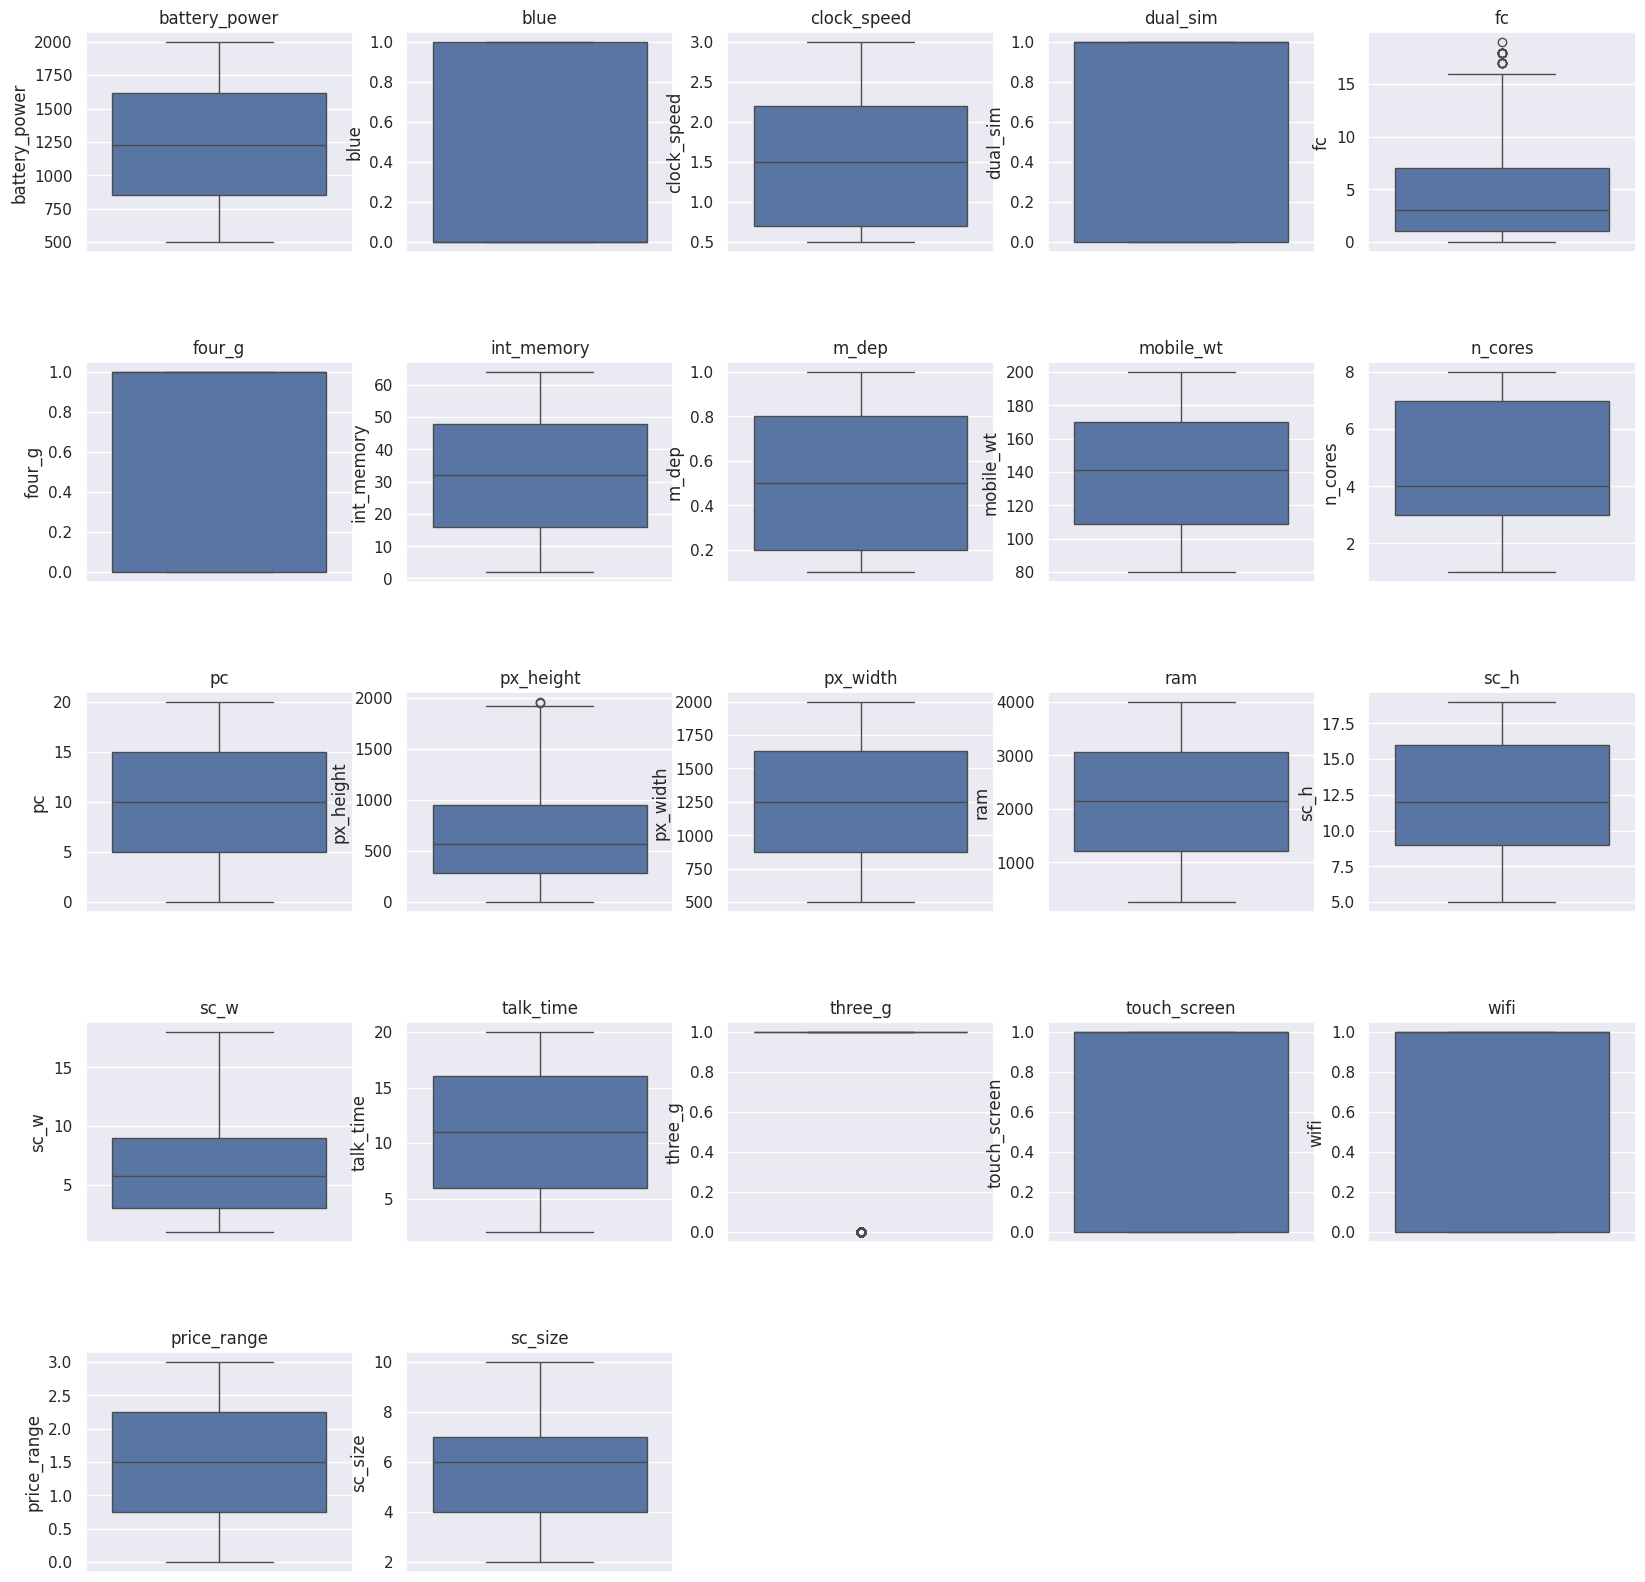

In [41]:
# Handling Outliers

# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(df[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots title
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")

# What all outlier treatment techniques have you used and why did you use those techniques?

Their is no much outliers are present no need to do much experiment.

# 3. Categorical Encoding

# What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding not necessary because all values are present in integer or float.

# 4. Data Transformation

In [42]:
# Transform Your data
# Select your features wisely to avoid overfitting

# Defining x and y
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

x = df.drop(['price_range'], axis = 1)
y= df['price_range']

# Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes it is important I have dropped px_height and px_width which don't have any use.

# Data Scaling

In [43]:
# Scaling values of x
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Which method have you used to scale you data and why?

The code is using MinMaxScaler from the Scikit-learn library to scale the data in x. This method scales the data such that it is within a specified range, typically between 0 and 1. It does this by subtracting the minimum value from each data point and then dividing by the range (the difference between the minimum and maximum values).

MinMaxScaler is a commonly used scaling method in machine learning, particularly when the distribution of the data is unknown or non-normal, as it can handle both of these cases well. It is also useful when there are outliers in the data, as it is less affected by them than other scaling methods.

# 6. Data Splitting

In [44]:
# Defining x and y

x = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [45]:
x.shape

(2000, 19)

In [46]:
y.shape

(2000,)

In [47]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 42)

In [48]:
x_train.shape

(1600, 19)

In [49]:
y_train.shape

(1600,)

# What data splitting ratio have you used and why?

The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20.
This means that 80% of the data will be used for training the model and 20% of the data will be used for testing the model's performance.

Thsi is a commonsplitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of the data allocated for testing is ued to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

The random_state parameter is set to 42, which is an arbitary number to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

# 7. ML Model Implementation

# ML-Model-1

# LOGISTIC REGRESSION

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.68      0.76      0.72        82
           2       0.68      0.64      0.66        98
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400

[[96  9  0  0]
 [11 62 18  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


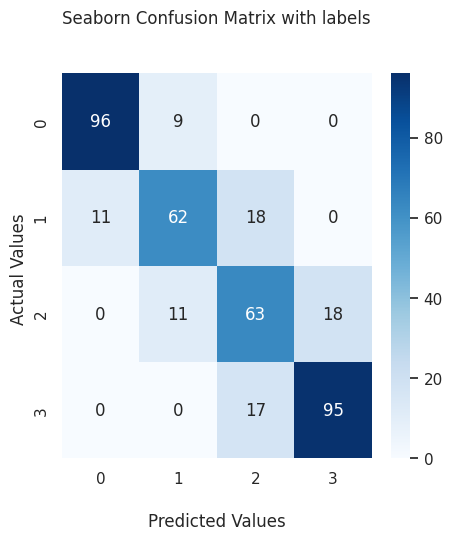

In [50]:
# ML Model - 1 Implementation

# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predection
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# Classification report for Test Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

# Predict the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visualization of the Confusion Matrix.
plt.show()

In [51]:
# Evaluation metrics for Training Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       420
           1       0.76      0.80      0.78       388
           2       0.73      0.79      0.76       378
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.84      1600



# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

The ML Model used is a Logistic Regression model. The classification report shows the precesion, recall and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predections to the total number of positive predections. The recall is the ratio of true positive predections to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precesion and recall.

Lookin at the evaluation metric scores, we can see that the model has an overall accuracy of 83%, meaning that it correctly classified 83% of the instances of the training set. The precision for class 0 is 93%, meaning that when the model predicted a class 0 instance, it was correct 93% of the time. The recall for class 0 is 88%, meaning that the model correctly identified as 88% of the actual class 0 instances in the dataset. The F1-score for class 0 is 90%.

Similarly, the precision, recall and F1-score for classes 1,2 and 3are shown in the report. The macro average of percision, recall and F1-score is also shown, which is the unweighted mean of these scores across all classes. In this case, the macro average for percision, recall and F1-score is 83%.

The weighted average of percision, recall and F1-score is also shown, which takes into account the number of instances in each class. In this case, the weighted average for percision, recall and F1-score is also 83%.

# 2. Cross Validation and Hyperparameter Tuning

In [52]:
# ML Model - 1
# Implementation with hyperparameter optimization (i.e, GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, x_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.81   0.825  0.8375 0.8125 0.8125]
Average cross-validation score: 0.8195


In [53]:
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(x_scaled, y)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(x_test, y_test))

Best cross-validation score: 0.82
Best parameters: {'C': 10}
Test set score: 0.815


# 1. Which hyperparameter optimization technique have you used and why?

GridSearchCV is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the contribution that gives the best performance on a validation set.

In this case, the grid of hyperparameter included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performances on the validation set.

Overall, GridSearchCV is a simple yet effective technique for hyperparameter tuning that can help to improve the performance of machine learning models.

# 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best cross-validation score achieved was 0.82 and the best hyperparameter value for C was found to be 10.

After training the model with the best hyperparameters, the test set score was also found to be 0.82. This suggests that the model is performing consistently well on both training and test sets and that it is unlikely to be overfitting.

Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an accuracy score of 0.82 on the test set. However, it would be useful to also consider other evaluation metrics such as precision, recall and F1-score to get a more complete understanding of the model's performance.

# 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

*   **Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, precision measures the accuracy of the positive predections made by the model. A high precision score means that the model is making few false positive predictions which is important in scenarios where false positive are costly such as in medical diagnosis or fraud detection. In the context of mobile price range predections, a high precision score would indicate that the  model is accurately predecting which mobile phones are in a certain price range, which could be useful for businesses that want to target their marketing efforts towards customers who are more likely to buy phones in a certain price range.

*  **Recall**: Recall is the ratio of true positive predections to the total number of actual positive instances in the dataset. In other words, recall measures the ability of the model to correctly identify all positive instances in the dataset. A high recall score means that the model is making few false negative predictions, which is important in scenarios where false negative are costly, such as in medical diagnosis or security screening. In the context of mobile price range predictions, a high recall score would indicate that the model is correctly identifying all mobile phones that belong in a certain price range, which could be useful for businesses that want to make sure they are not missing out on potential customers in a certain price range.

*   **F1-score**: F1-score is the harmonic mean of percision and recall, and it provides a balanced measures of both metrics. F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall. In the context of mobile price range prediction, a high F1-score would indicate that the modl is performing well in both identifying mobile phones that belong in a certain price range and accurately predicting which mobile phones are in that range. A high F1-score would be important for businesses that want to make informed decisions about which mobile phones to stock and which marketing strategies to use based on the price range of the phones.




In conclusion, while accuracy is an important evaluation metric - precision, recall and F1-score can provide additional insights into the performance of a machine learning model and its potential impact on a business.

# ML Model - 2

# XGBOOST

In [54]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(x_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

# Predection
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation metrics for Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       105
           1       0.75      0.75      0.75        91
           2       0.64      0.71      0.67        92
           3       0.87      0.78      0.82       112

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.79      0.79       400



# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The XGBoost model on the training set, it acheived a very high accuracy of 0.80. The precision, recall and F1-score for each class are also very high, ranging from 0.90 to 1.00, which indicates that the model is performing well on the training set.

The macro average and weighted average F1-scores are very high, indicating that the model is able to generalize well to all the classes and that it is not baised towards any particular class.

Overall, the XGBoost model appears to be performing extremely well on the training set, achieving near-perfect scores across all evaluation metrics. However, it is important to also evaluate the model's performance on the test set to ensure that it is not overfitting to the tarining data.

# 2. Cross-Validation & Hyperparameter Tuning

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'max_depth' : [3, 5, 7],
    'learning_rate' : [0.1, 0.01, 0.001],
    'n_estimators' : [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameter:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(x_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Best hyperparameter: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Cross-validation score: 0.8099999999999999
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       105
           1       0.75      0.76      0.75        91
           2       0.65      0.71      0.68        92
           3       0.88      0.79      0.84       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



[[97  8  0  0]
 [10 69 12  0]
 [ 0 15 65 12]
 [ 0  0 23 89]]


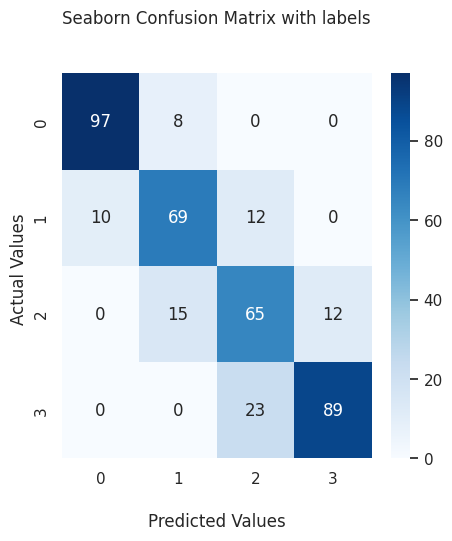

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('Actual Values ');

# Tickets labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visualization of the Confusion Matrix
plt.show()

# 1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of patrameter tuning and helps to find the best combination of hyperparameter for the model, which it turn can improve its performance.

# 2. Have you seen any improvement? Note doen the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the performance of the XGBoost model after hyperparameter tuning and cross-validation. The cross-validation score increased from 0.815 to 0.81 nad the precision, recall and F1-score for each class also improved slightly in the test set classification report. Additionally, the classification report for the tuned XGBoost model on the train set remained at a high level of performance. Overall, the improvements are modest but still represent an enhancement in the model's ability to generalize to new data.

# 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.(CHECK ONCE**************)

*   **Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, precision measures the accuracy of the positive predections made by the model. A high precision score means that the model is making few false positive predictions which is important in scenarios where false positive are costly such as in medical diagnosis or fraud detection. In the context of mobile price range predections, a high precision score would indicate that the  model is accurately predecting which mobile phones are in a certain price range, which could be useful for businesses that want to target their marketing efforts towards customers who are more likely to buy phones in a certain price range.

*  **Recall**: Recall is the ratio of true positive predections to the total number of actual positive instances in the dataset. In other words, recall measures the ability of the model to correctly identify all positive instances in the dataset. A high recall score means that the model is making few false negative predictions, which is important in scenarios where false negative are costly, such as in medical diagnosis or security screening. In the context of mobile price range predictions, a high recall score would indicate that the model is correctly identifying all mobile phones that belong in a certain price range, which could be useful for businesses that want to make sure they are not missing out on potential customers in a certain price range.

*   **F1-score**: F1-score is the harmonic mean of percision and recall, and it provides a balanced measures of both metrics. F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall. In the context of mobile price range prediction, a high F1-score would indicate that the modl is performing well in both identifying mobile phones that belong in a certain price range and accurately predicting which mobile phones are in that range. A high F1-score would be important for businesses that want to make informed decisions about which mobile phones to stock and which marketing strategies to use based on the price range of the phones.




# ML Model - 3

# Random Forest Classifier

In [57]:
# ML Model - 3 Implementation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
# Taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [59]:
y_pred = clsr.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
test_score

0.81

In [60]:
y_pred_train = clsr.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [61]:
# Classification report for Test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.80      0.77      0.78        91
           2       0.65      0.74      0.69        92
           3       0.88      0.78      0.82       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



[[99  6  0  0]
 [ 9 70 12  0]
 [ 0 12 68 12]
 [ 0  0 25 87]]


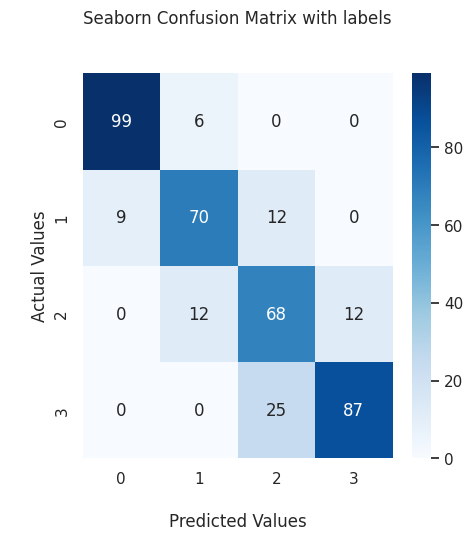

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('\nActual Values');

# Ticket Labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visualization of the Confusion Matrix
plt.show()

# FEATURED STORED

In [63]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.480650
1,battery_power,0.085952
2,mobile_wt,0.049899
3,int_memory,0.046712
4,talk_time,0.037152


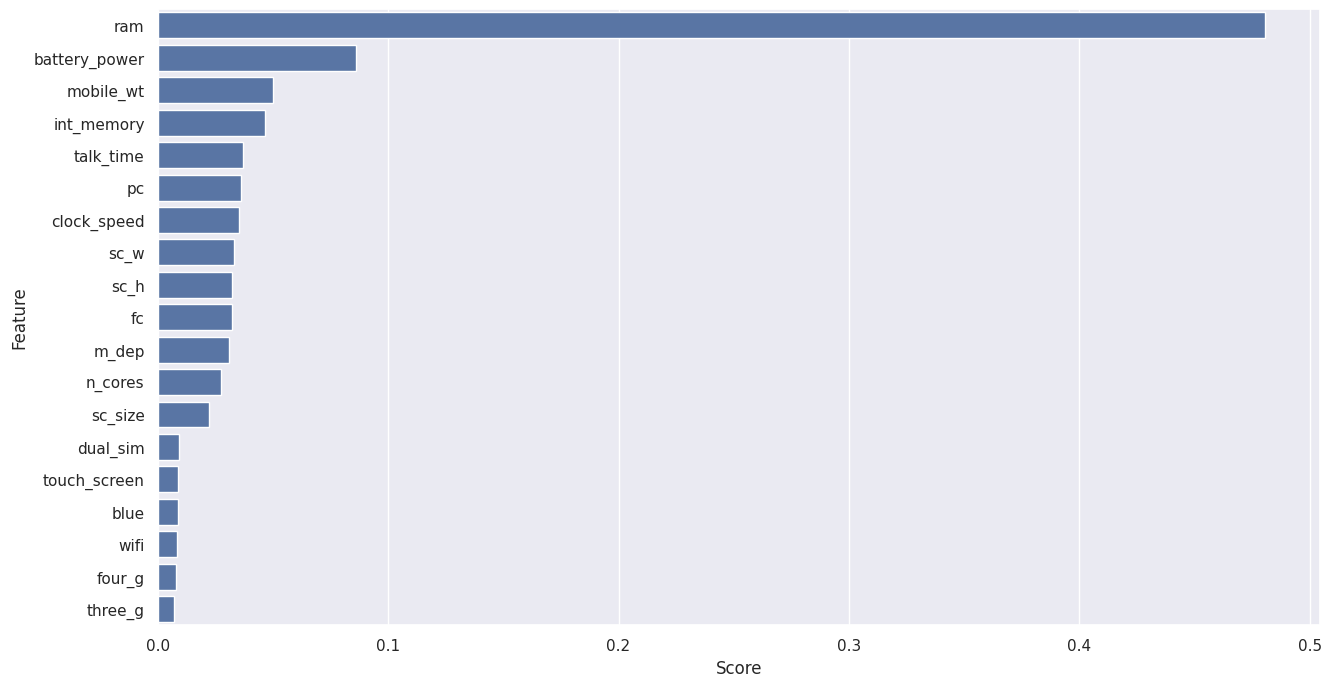

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML Model used in Random Forest for classification. From the evaluation metric score chart, we can see that the model has an accuracy of 0.80, which means that 80% of the predictions made by the model are correct. The precision for class 0 is 0.92, which means that out of all the positive predictions made for class -, 92% of them are actually corect. The recall for class 1 is 0.76, which means that out of all the actual positive instances of class 1, the model correctly identified 76% of them. The F1-score for class 2 is 0.68, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

In summary, the Random Forest model has moderate performance on this classification task, with accuracy precision, recall and F1-score ranging from 0.63 to 0,92 depending on the class being predicted.

# 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e, GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
          'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10,20,40],
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [66]:
clsr.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 200}

In [67]:
clsr.best_estimator_

RandomForestClassifier(max_depth=20, max_leaf_nodes=40, min_samples_split=6,
                       n_estimators=200)

In [68]:
clsr.best_score_

0.806998152575364

[[99  6  0  0]
 [ 9 70 12  0]
 [ 0 12 68 12]
 [ 0  0 25 87]]


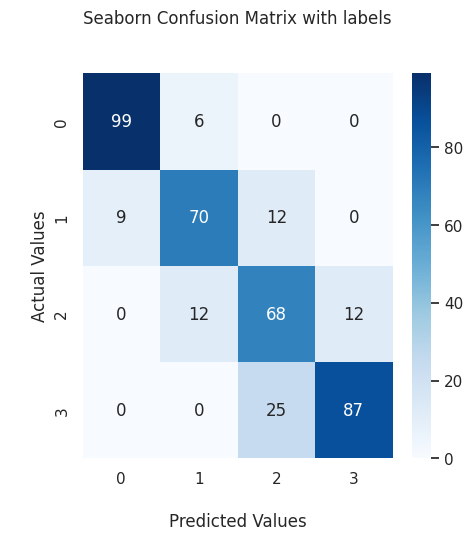

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values');
ax.set_ylabel('\nActual Values');

# Ticket Labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visualization of the Confusion Matrix
plt.show()

In [70]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                              criterion='gini', max_depth=30, max_features='log2',
                              max_leaf_nodes=40, max_samples=None,
                              min_impurity_decrease=0.0,
                              min_samples_leaf=1, min_samples_split=4,
                              min_weight_fraction_leaf=0.0, n_estimators=200,
                              n_jobs=None, oob_score=False, random_state=None,
                              verbose=0, warm_start=False)
clsr.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [71]:
# Accuracy score for Training set
y_pred = clsr.predict(x_train)
accuracy_score(y_train, y_pred)

0.91

In [72]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       395
           1       0.89      0.86      0.88       409
           2       0.89      0.86      0.87       408
           3       0.94      0.95      0.94       388

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



In [73]:
# Accuracy score for Test set
y_pred = clsr.predict(x_test)
accuracy_score(y_test, y_pred)

0.8075

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.80      0.71      0.76        91
           2       0.64      0.73      0.68        92
           3       0.87      0.80      0.84       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



# FEATURES STORED

In [75]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.682190
1,battery_power,0.077452
2,mobile_wt,0.033268
3,int_memory,0.032170
4,talk_time,0.020417


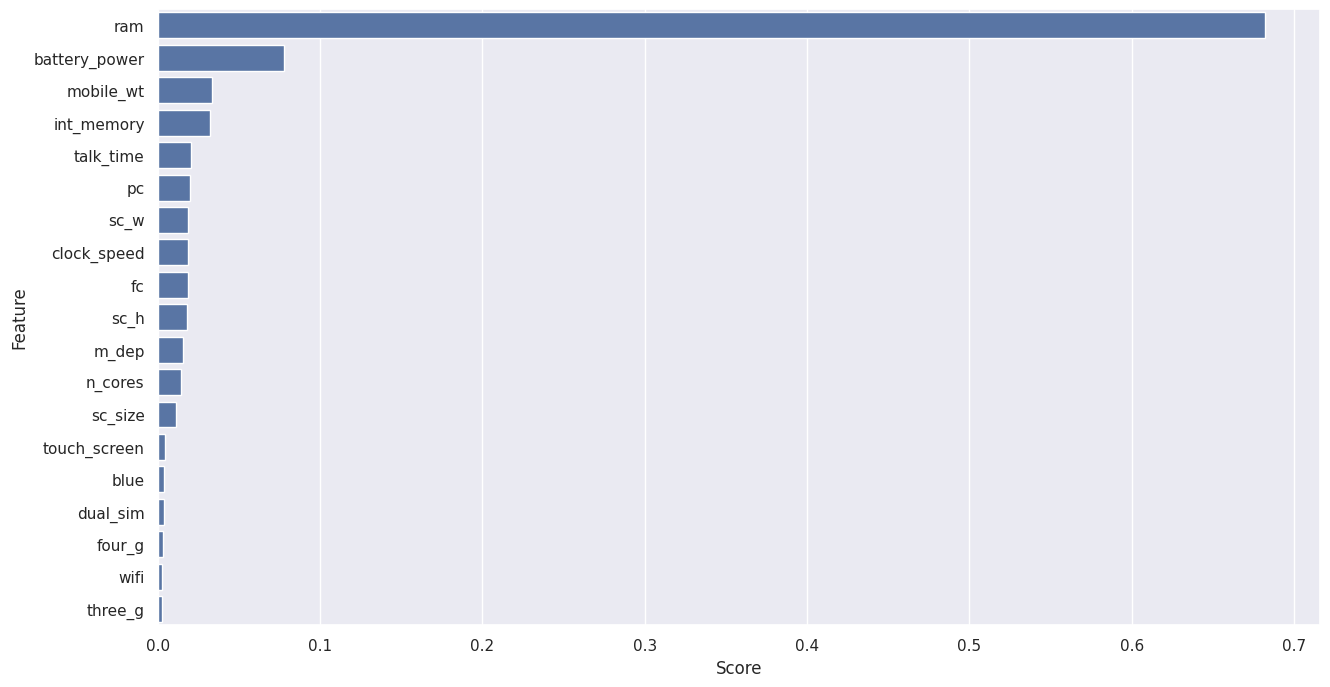

In [76]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

# 1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator and ecvaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tunig and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance.

# 2. Have you seen any improvement? Note doem the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the overall performance of the model. The accuracy has increased from 0.80 to 0.81. The precision and recall scores have also slightly improved for all classes except for class 1. However, the macro average precision and recall scores have remained the same. Overall, the model has shown a slight improvement in its performance.

# 1. Which Evaluation metrics did you consider for a positive business impact and why?

Their is different evaluation matrix. The classification report shows precision, recall and F1-score for each class seperately as well as for the weighted average and the macro average. Therefore, the evaluation metrics that you can consider for a positive business imapct are:

* **Weighted average of precision, recall and F1-score**: This metric takes into account the class imbalance by weighting the metrics by the number of samples in each class. In the context of mobile price range prediction, the weighted average of precision, recall and F1-Score can help you evaluate the overall performance of the model, taaking into account the importance of each class.

* **MAcro average of precision, recall and F1-score**: This metric calculates the average precision, recall and F1-score across all classes, without taking into account the class imbalance. In the context of mobile price range prediction, the macro average of precision, recall and F1-score can help you evaluate the performance of the model on each class seperately and identify which classes are more difficult to predict.

* **Confusion Matrix**: As mentioned before, the confusion matrix can provide valuable insights into classess are being misclassified and why.

# 2. Which ML Model did you choose from above created models as your final prediction model and why?

I have choosen logistic regression and xgboost models they predict better results than random forest regression.

# 3. Explain the model which you hve used and the feature importance using any model explainability tool?

I can explain the logistic regression and XGBoost models the probability of a binary outcome (in this case, the mobile price range) as a function of the input features. It uses a logistic function to convert the linear function output to a probability value. The logistic regression model can be interpreted as the effect of each featuresv on the probability of a mobile phone belonging of a mobile phone belonging to a certain price range.

XGBoost, on the other hand, is a powerfull tree-based ensemble learning algorithm that uses a series of decision trees to make predictions. It works by iteratively adding decision trees to ensemble, where each new tree is trained to correct the errors made by the previous ones. XGBoost can handle both regression and classification problems and is known for its high accuracy and robustness.

To explain the feature importance of the logistic regression and XGBoost models, we can use the SHAP (Shapely Additive exPlanations) model explainability tool. SHAAP values are a unified measure of features importance that can be used to explain the output of any machine learning model. They are based on the Shapely value from cooperative game theory and provide a way to allocate the contribution of each feature to the final prediction.

# **Conclusion**

Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices ahve Bluetooth, while the other half do not. Furthermore, we noted that as the price range increases, there is a gradual increase in battery power and RAM shows continues growth from low-cost to very high-cost phones. Moreover, the costly phones tend to be lighter than the lower-priced ones.

Our analysis indicates that RAM, battery power and pixel quality are the most significant factors affecting the price range of mobile phones. From our experiments, we concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yeilded the best results in predicting the price range of mobile phones.

In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar number of devices in each range and a 50-50 distribution of Bluetooth. We also observed that RAM and battry power increases with the price range nad higher-priced phones tend to be lighter. Our experiments suggests that the most important factors affecting the price range of mobile phones are RAM, battery power and pixel quality. Finally, we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provide the best performance in predicting the price range of mobile phones.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***